### Explore Bike Share Data Project



In [309]:
# Import libraries.
library(tidyverse)

In [310]:
# Read csv files into dataframe.
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [311]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [312]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [313]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [314]:
# Add a new column (City) to each dataset,
# to distinguish after merging.
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [315]:
# Place all 3 data frames into a list.
df_all <- list(ny, wash, chi)

# Merge all 3 data frames from the list.
df_final <- Reduce(function(x, y) merge(x, y, all = TRUE), df_all)
                   
head(df_final)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,City,Gender,Birth.Year
7,2017-01-01 00:11:00,2017-01-01 00:14:00,200.077,Adams Mill & Columbia Rd NW,Calvert St & Woodley Pl NW,Subscriber,Washington,NA,NA
13,2017-01-01 00:16:00,2017-01-01 00:26:00,600.116,Prince St & Union St,King St Metro South,Subscriber,Washington,NA,NA
21,2017-01-01 00:23:00,2017-01-01 00:32:00,543.776,New Hampshire Ave & T St NW,11th & O St NW,Subscriber,Washington,NA,NA
36,2017-01-01 00:40:14,2017-01-01 00:46:32,378.000,Ritchie Ct & Banks St,Clark St & Lincoln Ave,Subscriber,Chicago,Male,1964
47,2017-01-01 00:17:01,2017-01-01 00:32:20,919.000,W 27 St & 7 Ave,E 17 St & Broadway,Customer,New York City,,NA
61,2017-01-01 00:52:00,2017-01-01 00:57:00,274.500,14th St & New York Ave NW,12th & L St NW,Subscriber,Washington,NA,NA


In [316]:
# Convert Trip.Duration column to integer.
df_final$Trip.Duration <- as.integer(df_final$Trip.Duration)  

# To verify datatype.
class(df_final$Trip.Duration)

[1] "integer"

In [317]:
# Displays the number of rows for comparison before removing rows with NA values.
nrow(df_final)

# Removes rows with NA values from the User.Type column.
df_final <- df_final[!(df_final$User.Type == "" | is.na(df_final$User.Type)), ]

# Removes rows with NA values from the City column.
df_final <- df_final[!(df_final$City == "" | is.na(df_final$City)), ]

# Displays the number of rows for comparison after removing rows with NA values.
nrow(df_final)

[1] 152451

[1] 152330

### Question 1

# Are There More Customers or Subscribers in Each City?

In [318]:
# Creates a copy of the dataframe with only 2 columns.
df_final1 <- df_final[, c('User.Type', 'City')]

head(df_final1)

User.Type,City
Subscriber,Washington
Subscriber,Washington
Subscriber,Washington
Subscriber,Chicago
Customer,New York City
Subscriber,Washington


In [319]:
# Creates a copy of the dataframe, which is grouped by City and 
# User.Type, and the values counted and placed in a new column. 
df_sub_cities <- df_final1 %>%
    group_by(City, User.Type) %>% 
    summarize(Total = n(), .groups = 'drop') %>%
    as.data.frame()

head(df_sub_cities)

City,User.Type,Total
Chicago,Customer,1746
Chicago,Subscriber,6883
New York City,Customer,5558
New York City,Subscriber,49093
Washington,Customer,23450
Washington,Subscriber,65600


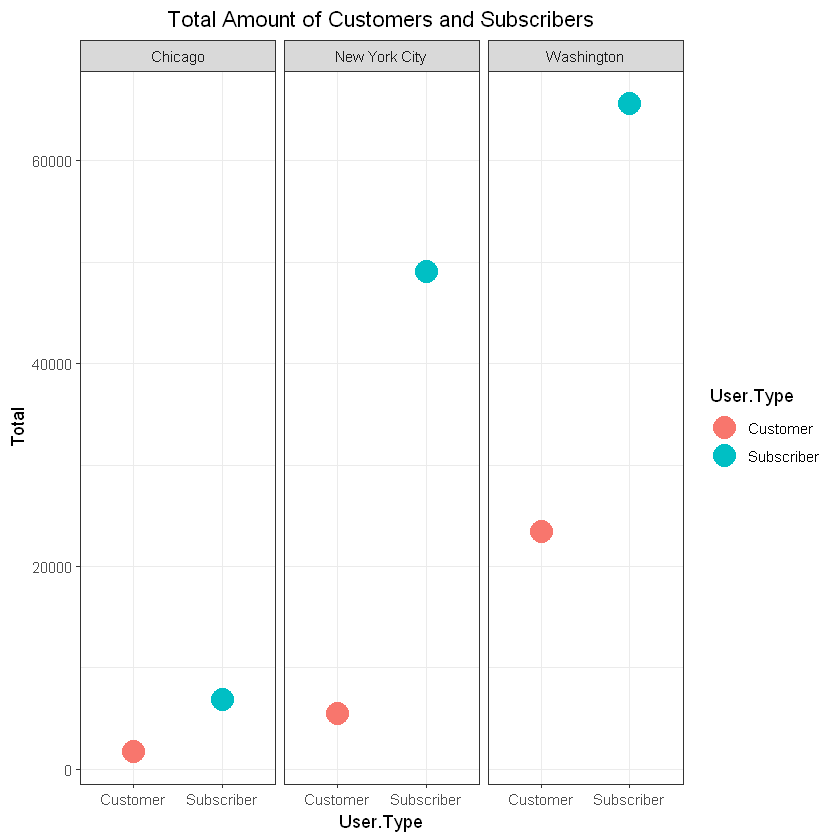

In [320]:
# Creates a faceted scatter plot.
df_sub_cities %>%
    ggplot(aes(User.Type, Total, color = User.Type)) +
    geom_point(size = 6) +
    geom_smooth(method = lm, se = F) +
    facet_wrap(~City) +
    ggtitle('Total Amount of Customers and Subscribers') +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5)) 

## There are significantly more Subscribers than Customers in all 3 cities.

### Question 2

# Do Users Return to the Same Station or a Different Station?

In [321]:
# Creates a copy of the dataframe with only 3 columns.
df_final2 = df_final[, c('User.Type', 'Start.Station', 'End.Station')]

In [322]:
# Convert datatypes in 2 columns to character.
df_final2$Start.Station <- as.character(df_final2$Start.Station)

df_final2$End.Station <- as.character(df_final2$End.Station)

In [323]:
# Creates a column and inserts value based on condition.
df_final2$Return.Station = ifelse(df_final2$Start.Station == df_final2$End.Station, 'Same', 'Different')

head(df_final2)

User.Type,Start.Station,End.Station,Return.Station
Subscriber,Adams Mill & Columbia Rd NW,Calvert St & Woodley Pl NW,Different
Subscriber,Prince St & Union St,King St Metro South,Different
Subscriber,New Hampshire Ave & T St NW,11th & O St NW,Different
Subscriber,Ritchie Ct & Banks St,Clark St & Lincoln Ave,Different
Customer,W 27 St & 7 Ave,E 17 St & Broadway,Different
Subscriber,14th St & New York Ave NW,12th & L St NW,Different


In [324]:
# Creates a copy of the dataframe, which is grouped by User.Type and 
# Return.Station, and the values counted and placed in a new column.
df_sub_cities2 <- df_final2 %>%
    group_by(User.Type, Return.Station) %>% 
    summarize(Total = n(), .groups = 'drop') %>%
    as.data.frame()

head(df_sub_cities2)

User.Type,Return.Station,Total
Customer,Different,27607
Customer,Same,3147
Subscriber,Different,119744
Subscriber,Same,1832


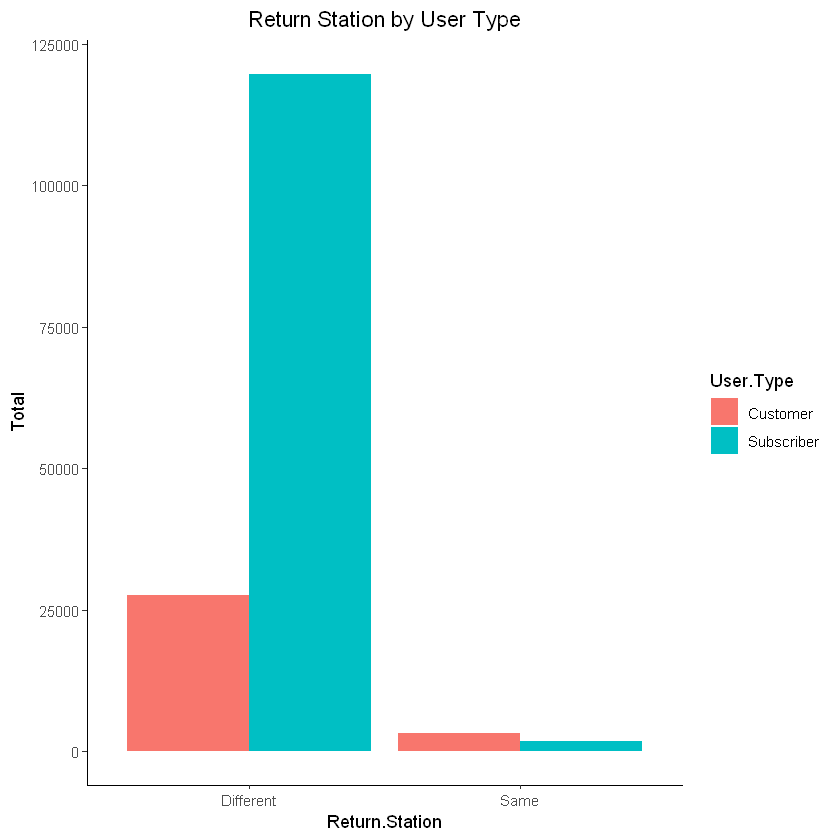

In [325]:
# Creates 2 bar graphs for comparison.
ggplot(df_sub_cities2, aes(x = Return.Station, y=Total, fill = User.Type)) + 
    geom_bar(stat = 'identity', position = 'dodge') +
    ggtitle('Return Station by User Type') +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5)) 

## Nearly all users return to a different station, and the majority are subscribers.

### Question 3

# Which City Has the Longest Trip Duration Average?

In [326]:
# Creates a copy of the dataframe with only 2 columns.
df_final3 <- df_final[, c('City', 'Trip.Duration')]

head(df_final3)

City,Trip.Duration
Washington,200
Washington,600
Washington,543
Chicago,378
New York City,919
Washington,274


In [327]:
# Calculates the mean for each city.
df_sub_cities3 <- aggregate(.~City, data = df_final3, mean)

df_sub_cities3

City,Trip.Duration
Chicago,936.9314
New York City,901.5961
Washington,1233.4533


In [328]:
# Converts the column to integer.
df_sub_cities3$Trip.Duration <- as.integer(df_sub_cities3$Trip.Duration) 

df_sub_cities3

City,Trip.Duration
Chicago,936
New York City,901
Washington,1233


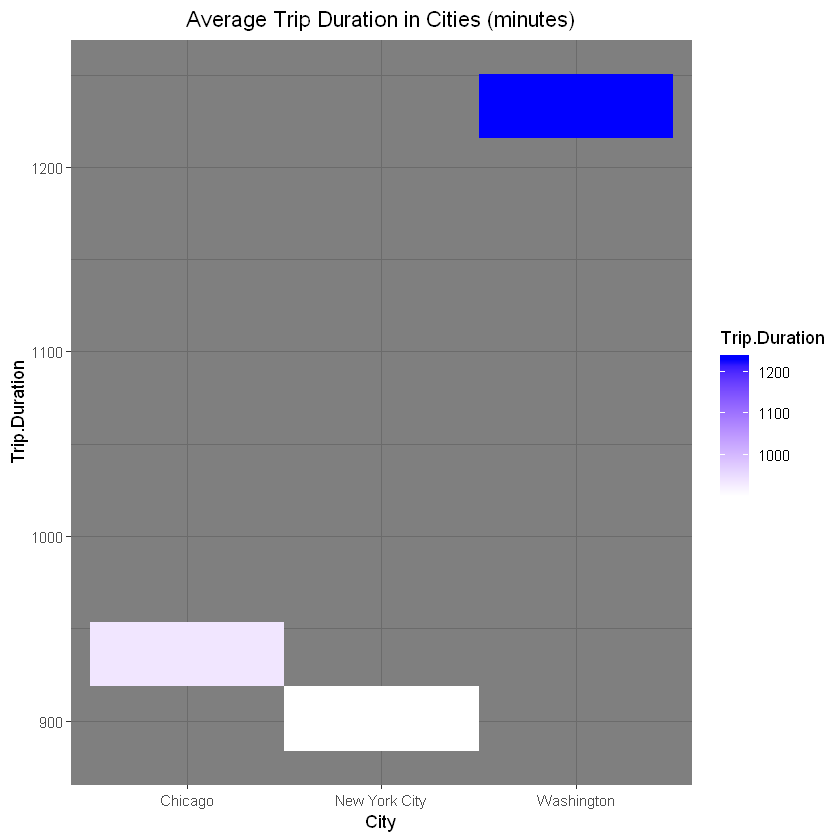

In [329]:
# Creates a tile plot graph.
ggplot(df_sub_cities3, aes(x = City, y = Trip.Duration, fill = Trip.Duration)) +
    geom_tile() +
    scale_fill_gradient(low = "white", high = "blue") +
    ggtitle('Average Trip Duration in Cities (minutes)') +
    theme_dark() +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5)) 

## Washington has the longest trip duration average of the 3 cities.

### Question 4

# Do Customers or Subscribers Have a Longer Trip Duration Average?

In [330]:
# Creates a copy of the dataframe with only 2 columns.
df_final4 <- df_final[, c('User.Type', 'Trip.Duration')]

head(df_final4)

User.Type,Trip.Duration
Subscriber,200
Subscriber,600
Subscriber,543
Subscriber,378
Customer,919
Subscriber,274


In [331]:
# Convert datatypes 2 columns.
df_final4$User.Type <- as.character(df_final4$User.Type) 

df_final4$Trip.Duration <- as.integer(df_final4$Trip.Duration) 

head(df_final4)

User.Type,Trip.Duration
Subscriber,200
Subscriber,600
Subscriber,543
Subscriber,378
Customer,919
Subscriber,274


In [332]:
# Calculates the mean for each user type.
df_sub_cities4 <- aggregate(.~User.Type, data = df_final4, mean)

df_sub_cities4

User.Type,Trip.Duration
Customer,2514.2913
Subscriber,739.2283


In [333]:
# Converts the column to integer.
df_sub_cities4$Trip.Duration <- as.integer(df_sub_cities4$Trip.Duration) 

df_sub_cities4

User.Type,Trip.Duration
Customer,2514
Subscriber,739


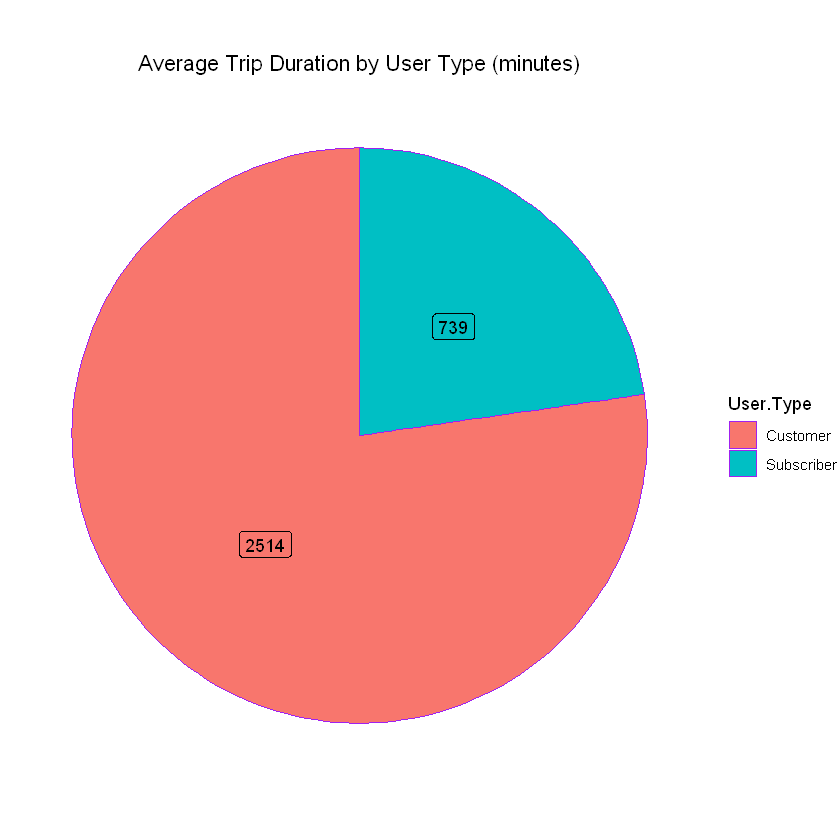

In [334]:
# Creates a pie chart.
ggplot(df_sub_cities4, aes(x = ' ', y = Trip.Duration, fill = User.Type)) +
    geom_bar(stat = "identity", color = "purple") +
    coord_polar(theta = "y") + 
    theme_void() +
    geom_label(aes(label = Trip.Duration),
    position = position_stack(vjust = .5), show.legend = FALSE) +
    ggtitle('Average Trip Duration by User Type (minutes)') +
    theme(plot.title = element_text(hjust = 0.5)) +
    theme(plot.title = element_text(hjust = 0.5))    

## Customers triple the trip duration average of subscribers (2,514 minutes = 1.75 days).